In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
selected_parameters = pd.read_csv('data/sleep_parameter_exploration/selected_sleep_parameters.csv', index_col=0)
simulation_features = pd.read_csv("data/chang14_realistic_conditions/realistic_conditions_simulation_features.csv", index_col=0)

# Sleep latency histogram comparison

## As a function of reading time

In [29]:
# Sleep latency at last condition day
scheduled_bedtime = 22.0
indoor_light = 90
reading_duration_times = [1, 2, 3]

df = pd.DataFrame()

for reading_duration in reading_duration_times:
    possible_days = (simulation_features['day'] == 6) | (simulation_features['day'] == 12)
    possible_simulation_conditions = (simulation_features['simulation_condition'] == 'chang14_ebook_first') |  \
                                    (simulation_features['simulation_condition'] == 'chang14_ebook_second')
    realistic_conditions = (simulation_features['indoor_light'] == indoor_light) & \
                        (simulation_features['reading_duration'] == reading_duration)

    book_sleep_latency = simulation_features[possible_days & (simulation_features['daily_condition'] == 'Book') & 
                                            possible_simulation_conditions &
                                            realistic_conditions]['sleep_latency_minutes']

    ebook_sleep_latency = simulation_features[possible_days & (simulation_features['daily_condition'] == 'eBook') &
                                            possible_simulation_conditions &
                                            realistic_conditions]['sleep_latency_minutes']

    sub_df = pd.DataFrame({
        'sleep_latency': np.concatenate([book_sleep_latency, ebook_sleep_latency]),
        'condition': ['Book'] * len(book_sleep_latency) + ['eBook'] * len(ebook_sleep_latency),
        'reading_duration': [reading_duration] * (len(book_sleep_latency) + len(ebook_sleep_latency))
    })
    df = pd.concat([df, sub_df])

In [30]:
# Add baseline condition to the data set for comparison
baseline_simulation_features = pd.read_csv("data/chang14_selected_sleep_parameters/selected_sleep_parameters_simulation_features.csv")
scheduled_bedtime = 22.0
possible_days = (baseline_simulation_features['day'] == 6) | (baseline_simulation_features['day'] == 12)
possible_simulation_conditions = (baseline_simulation_features['simulation_condition'] == 'chang14_ebook_first') |  \
                                 (baseline_simulation_features['simulation_condition'] == 'chang14_ebook_second')
book_sleep_latency = baseline_simulation_features[possible_days & (baseline_simulation_features['daily_condition'] == 'Book') & 
                                         possible_simulation_conditions]['sleep_latency_minutes']

ebook_sleep_latency = baseline_simulation_features[possible_days & (baseline_simulation_features['daily_condition'] == 'eBook') &
                                          possible_simulation_conditions]['sleep_latency_minutes']

sub_df = pd.DataFrame({
    'sleep_latency': np.concatenate([book_sleep_latency, ebook_sleep_latency]),
    'condition': ['Book'] * len(book_sleep_latency) + ['eBook'] * len(ebook_sleep_latency),
    'reading_duration': [4] * (len(book_sleep_latency) + len(ebook_sleep_latency))
})
df = pd.concat([df, sub_df])

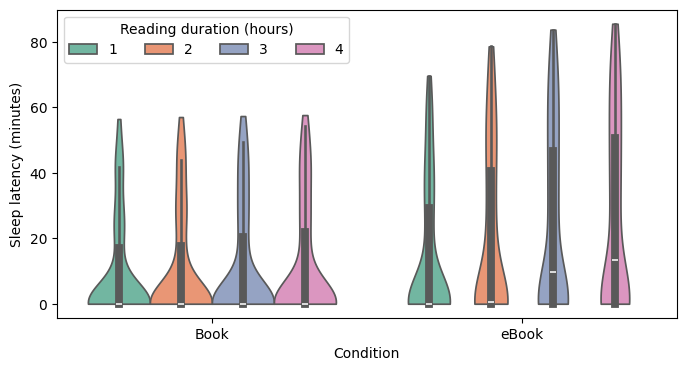

In [32]:
fig, ax = plt.subplots(figsize=(8, 4))
palette = sns.color_palette("Set2")[:4]
sns.violinplot(x='condition', y='sleep_latency', data=df, ax=ax,
               hue='reading_duration', palette=palette,
               cut=0, inner='box')
ax.set_ylabel('Sleep latency (minutes)')
ax.set_xlabel('Condition')
ax.legend(title='Reading duration (hours)', loc='upper left', ncol=4)
plt.show()

# As a function of indoor lux

In [33]:
# Sleep latency at last condition day
scheduled_bedtime = 22.0
reading_duration = 4
indoor_light_values = [140, 190, 240]

df = pd.DataFrame()

for indoor_light in indoor_light_values:
    possible_days = (simulation_features['day'] == 6) | (simulation_features['day'] == 12)
    possible_simulation_conditions = (simulation_features['simulation_condition'] == 'chang14_ebook_first') |  \
                                    (simulation_features['simulation_condition'] == 'chang14_ebook_second')
    realistic_conditions = (simulation_features['indoor_light'] == indoor_light) & \
                        (simulation_features['reading_duration'] == reading_duration)

    book_sleep_latency = simulation_features[possible_days & (simulation_features['daily_condition'] == 'Book') & 
                                            possible_simulation_conditions &
                                            realistic_conditions]['sleep_latency_minutes']

    ebook_sleep_latency = simulation_features[possible_days & (simulation_features['daily_condition'] == 'eBook') &
                                            possible_simulation_conditions &
                                            realistic_conditions]['sleep_latency_minutes']

    sub_df = pd.DataFrame({
        'sleep_latency': np.concatenate([book_sleep_latency, ebook_sleep_latency]),
        'condition': ['Book'] * len(book_sleep_latency) + ['eBook'] * len(ebook_sleep_latency),
        'indoor_light': [indoor_light] * (len(book_sleep_latency) + len(ebook_sleep_latency))
    })
    df = pd.concat([df, sub_df])

In [34]:
# Add baseline condition to the data set for comparison
baseline_simulation_features = pd.read_csv("data/chang14_selected_sleep_parameters/selected_sleep_parameters_simulation_features.csv")
scheduled_bedtime = 22.0
possible_days = (baseline_simulation_features['day'] == 6) | (baseline_simulation_features['day'] == 12)
possible_simulation_conditions = (baseline_simulation_features['simulation_condition'] == 'chang14_ebook_first') |  \
                                 (baseline_simulation_features['simulation_condition'] == 'chang14_ebook_second')
book_sleep_latency = baseline_simulation_features[possible_days & (baseline_simulation_features['daily_condition'] == 'Book') & 
                                         possible_simulation_conditions]['sleep_latency_minutes']

ebook_sleep_latency = baseline_simulation_features[possible_days & (baseline_simulation_features['daily_condition'] == 'eBook') &
                                          possible_simulation_conditions]['sleep_latency_minutes']

sub_df = pd.DataFrame({
    'sleep_latency': np.concatenate([book_sleep_latency, ebook_sleep_latency]),
    'condition': ['Book'] * len(book_sleep_latency) + ['eBook'] * len(ebook_sleep_latency),
    'indoor_light': [90] * (len(book_sleep_latency) + len(ebook_sleep_latency))
})
df = pd.concat([df, sub_df])

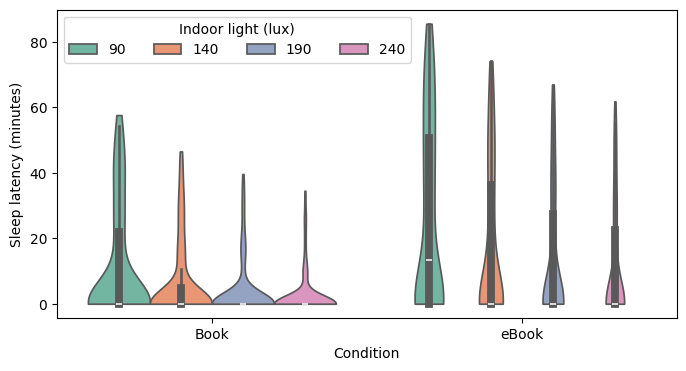

In [35]:
fig, ax = plt.subplots(figsize=(8, 4))
palette = sns.color_palette("Set2")[:4]
sns.violinplot(x='condition', y='sleep_latency', data=df, ax=ax,
               hue='indoor_light', palette=palette,
               cut=0, inner='box')
ax.set_ylabel('Sleep latency (minutes)')
ax.set_xlabel('Condition')
ax.legend(title='Indoor light (lux)', loc='upper left', ncol=4)
plt.show()

# Sleep duration

## As a function of reading time

In [45]:
# Sleep duration at last condition day
scheduled_bedtime = 22.0
indoor_light = 90
reading_duration_times = [1, 2, 3]

df = pd.DataFrame()

for reading_duration in reading_duration_times:
    possible_days = (simulation_features['day'] == 6) | (simulation_features['day'] == 12)
    possible_simulation_conditions = (simulation_features['simulation_condition'] == 'chang14_ebook_first') |  \
                                    (simulation_features['simulation_condition'] == 'chang14_ebook_second')
    realistic_conditions = (simulation_features['indoor_light'] == indoor_light) & \
                        (simulation_features['reading_duration'] == reading_duration)

    book_sleep_duration = simulation_features[possible_days & (simulation_features['daily_condition'] == 'Book') & 
                                            possible_simulation_conditions &
                                            realistic_conditions]['sleep_duration']

    ebook_sleep_duration = simulation_features[possible_days & (simulation_features['daily_condition'] == 'eBook') &
                                            possible_simulation_conditions &
                                            realistic_conditions]['sleep_duration']

    sub_df = pd.DataFrame({
        'sleep_duration': np.concatenate([book_sleep_duration, ebook_sleep_duration]),
        'condition': ['Book'] * len(book_sleep_duration) + ['eBook'] * len(ebook_sleep_duration),
        'reading_duration': [reading_duration] * (len(book_sleep_duration) + len(ebook_sleep_duration))
    })
    df = pd.concat([df, sub_df])

In [46]:
# Add baseline condition to the data set for comparison
baseline_simulation_features = pd.read_csv("data/chang14_selected_sleep_parameters/selected_sleep_parameters_simulation_features.csv")
scheduled_bedtime = 22.0
possible_days = (baseline_simulation_features['day'] == 6) | (baseline_simulation_features['day'] == 12)
possible_simulation_conditions = (baseline_simulation_features['simulation_condition'] == 'chang14_ebook_first') |  \
                                 (baseline_simulation_features['simulation_condition'] == 'chang14_ebook_second')
book_sleep_duration = baseline_simulation_features[possible_days & (baseline_simulation_features['daily_condition'] == 'Book') & 
                                         possible_simulation_conditions]['sleep_duration']

ebook_sleep_duration = baseline_simulation_features[possible_days & (baseline_simulation_features['daily_condition'] == 'eBook') &
                                          possible_simulation_conditions]['sleep_duration']

sub_df = pd.DataFrame({
    'sleep_duration': np.concatenate([book_sleep_duration, ebook_sleep_duration]),
    'condition': ['Book'] * len(book_sleep_duration) + ['eBook'] * len(ebook_sleep_duration),
    'reading_duration': [4] * (len(book_sleep_duration) + len(ebook_sleep_duration))
})
df = pd.concat([df, sub_df])

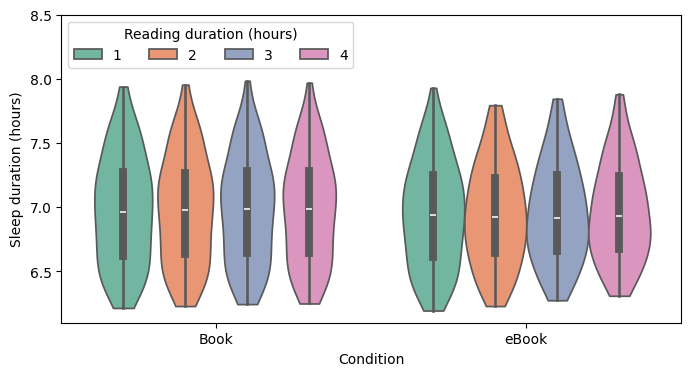

In [47]:
fig, ax = plt.subplots(figsize=(8, 4))
palette = sns.color_palette("Set2")[:4]
sns.violinplot(x='condition', y='sleep_duration', data=df, ax=ax,
               hue='reading_duration', palette=palette,
               cut=0, inner='box')
ax.set_ylabel('Sleep duration (hours)')
ax.set_xlabel('Condition')
ax.legend(title='Reading duration (hours)', loc='upper left', ncol=4)
ax.set_ylim(6.10, 8.50)
plt.show()

## As a function of indoor lux

In [48]:
# Sleep duration at last condition day
scheduled_bedtime = 22.0
reading_duration = 4
indoor_light_values = [140, 190, 240]

df = pd.DataFrame()

for indoor_light in indoor_light_values:
    possible_days = (simulation_features['day'] == 6) | (simulation_features['day'] == 12)
    possible_simulation_conditions = (simulation_features['simulation_condition'] == 'chang14_ebook_first') |  \
                                    (simulation_features['simulation_condition'] == 'chang14_ebook_second')
    realistic_conditions = (simulation_features['indoor_light'] == indoor_light) & \
                        (simulation_features['reading_duration'] == reading_duration)

    book_sleep_duration = simulation_features[possible_days & (simulation_features['daily_condition'] == 'Book') & 
                                            possible_simulation_conditions &
                                            realistic_conditions]['sleep_duration']

    ebook_sleep_duration = simulation_features[possible_days & (simulation_features['daily_condition'] == 'eBook') &
                                            possible_simulation_conditions &
                                            realistic_conditions]['sleep_duration']

    sub_df = pd.DataFrame({
        'sleep_duration': np.concatenate([book_sleep_duration, ebook_sleep_duration]),
        'condition': ['Book'] * len(book_sleep_duration) + ['eBook'] * len(ebook_sleep_duration),
        'indoor_light': [indoor_light] * (len(book_sleep_duration) + len(ebook_sleep_duration))
    })
    df = pd.concat([df, sub_df])

In [49]:
# Add baseline condition to the data set for comparison
baseline_simulation_features = pd.read_csv("data/chang14_selected_sleep_parameters/selected_sleep_parameters_simulation_features.csv")
scheduled_bedtime = 22.0
possible_days = (baseline_simulation_features['day'] == 6) | (baseline_simulation_features['day'] == 12)
possible_simulation_conditions = (baseline_simulation_features['simulation_condition'] == 'chang14_ebook_first') |  \
                                 (baseline_simulation_features['simulation_condition'] == 'chang14_ebook_second')
book_sleep_duration = baseline_simulation_features[possible_days & (baseline_simulation_features['daily_condition'] == 'Book') & 
                                         possible_simulation_conditions]['sleep_duration']

ebook_sleep_duration = baseline_simulation_features[possible_days & (baseline_simulation_features['daily_condition'] == 'eBook') &
                                          possible_simulation_conditions]['sleep_duration']

sub_df = pd.DataFrame({
    'sleep_duration': np.concatenate([book_sleep_duration, ebook_sleep_duration]),
    'condition': ['Book'] * len(book_sleep_duration) + ['eBook'] * len(ebook_sleep_duration),
    'indoor_light': [90] * (len(book_sleep_duration) + len(ebook_sleep_duration))
})
df = pd.concat([df, sub_df])

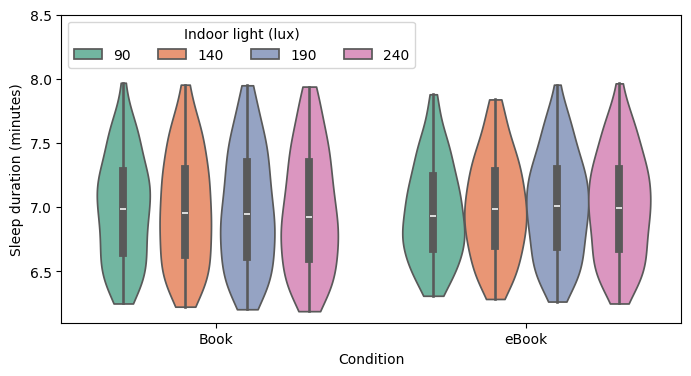

In [51]:
fig, ax = plt.subplots(figsize=(8, 4))
palette = sns.color_palette("Set2")[:4]
sns.violinplot(x='condition', y='sleep_duration', data=df, ax=ax,
               hue='indoor_light', palette=palette,
               cut=0, inner='box')
ax.set_ylabel('Sleep duration (minutes)')
ax.set_xlabel('Condition')
ax.legend(title='Indoor light (lux)', loc='upper left', ncol=4)
ax.set_ylim(6.10, 8.50)
plt.show()

# Mean sleep onset evolution

## As a function of reading time

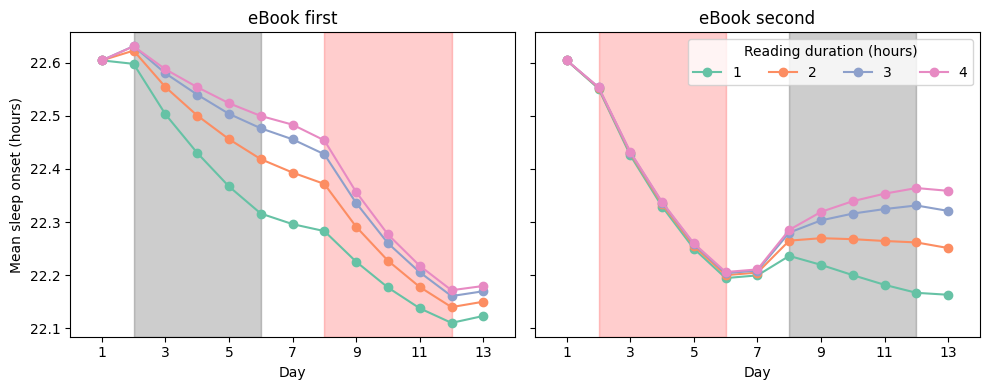

In [69]:
indoor_light = 90
reading_duration_times = [1, 2, 3, 4]

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

colors = sns.color_palette("Set2")[:4]

for idx, reading_duration in enumerate(reading_duration_times):
        if reading_duration < 4:
                ebook_first = simulation_features[(simulation_features['simulation_condition'] == 'chang14_ebook_first') &
                                                (simulation_features['indoor_light'] == indoor_light) &
                                                (simulation_features['reading_duration'] == reading_duration)]
                ebook_second = simulation_features[(simulation_features['simulation_condition'] == 'chang14_ebook_second') &
                                                (simulation_features['indoor_light'] == indoor_light) &
                                                (simulation_features['reading_duration'] == reading_duration)]

                ebook_first_sleep_onset = ebook_first.groupby('day')['sleep_onset'].mean()
                ebook_second_sleep_onset = ebook_second.groupby('day')['sleep_onset'].mean()
        else:
                ebook_first = baseline_simulation_features[(baseline_simulation_features['simulation_condition'] == 'chang14_ebook_first')]
                ebook_second = baseline_simulation_features[(baseline_simulation_features['simulation_condition'] == 'chang14_ebook_second')]

                ebook_first_sleep_onset = ebook_first.groupby('day')['sleep_onset'].mean()
                ebook_second_sleep_onset = ebook_second.groupby('day')['sleep_onset'].mean()

        days = np.arange(1, 14)


        axs[0].plot(days, ebook_first_sleep_onset,
                        marker='o', color=colors[idx], label=f"{reading_duration}")
        axs[0].axvspan(2, 6, color='black', alpha=0.05)
        axs[0].axvspan(8, 12, color='red', alpha=0.05)
        axs[0].set_title('eBook first')

        axs[1].plot(days, ebook_second_sleep_onset,
                        marker='o', color=colors[idx], label=f"{reading_duration}")
        axs[1].legend()
        axs[1].axvspan(2, 6, color='red', alpha=0.05)
        axs[1].axvspan(8, 12, color='black', alpha=0.05)
        axs[1].set_title('eBook second')

        axs[0].set_xlim(0, 14)
        axs[1].set_xlim(0, 14)
        axs[0].set_xticks(days[::2])
        axs[1].set_xticks(days[::2])

        axs[0].set_ylabel('Mean sleep onset (hours)')
        axs[0].set_xlabel('Day')
        axs[1].set_xlabel('Day')


axs[1].legend(title='Reading duration (hours)', loc='upper right', ncol=4)

plt.tight_layout()
plt.show()

## As a function of indoor lux

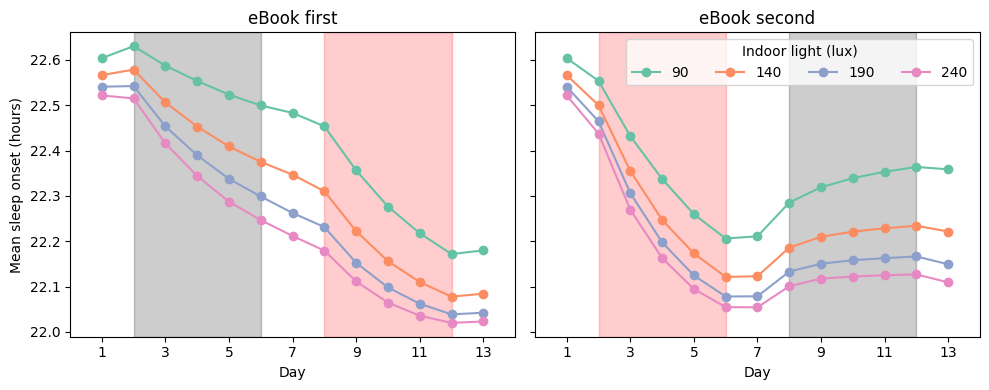

In [70]:
indoor_light_values = [90, 140, 190, 240]
reading_duration = 4

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

colors = sns.color_palette("Set2")[:4]

for idx, indoor_light in enumerate(indoor_light_values):
        if indoor_light > 90:
                ebook_first = simulation_features[(simulation_features['simulation_condition'] == 'chang14_ebook_first') &
                                                (simulation_features['indoor_light'] == indoor_light) &
                                                (simulation_features['reading_duration'] == reading_duration)]
                ebook_second = simulation_features[(simulation_features['simulation_condition'] == 'chang14_ebook_second') &
                                                (simulation_features['indoor_light'] == indoor_light) &
                                                (simulation_features['reading_duration'] == reading_duration)]

                ebook_first_sleep_onset = ebook_first.groupby('day')['sleep_onset'].mean()
                ebook_second_sleep_onset = ebook_second.groupby('day')['sleep_onset'].mean()
        else:
                ebook_first = baseline_simulation_features[(baseline_simulation_features['simulation_condition'] == 'chang14_ebook_first')]
                ebook_second = baseline_simulation_features[(baseline_simulation_features['simulation_condition'] == 'chang14_ebook_second')]

                ebook_first_sleep_onset = ebook_first.groupby('day')['sleep_onset'].mean()
                ebook_second_sleep_onset = ebook_second.groupby('day')['sleep_onset'].mean()

        days = np.arange(1, 14)


        axs[0].plot(days, ebook_first_sleep_onset,
                        marker='o', color=colors[idx], label=f"{indoor_light}")
        axs[0].axvspan(2, 6, color='black', alpha=0.05)
        axs[0].axvspan(8, 12, color='red', alpha=0.05)
        axs[0].set_title('eBook first')

        axs[1].plot(days, ebook_second_sleep_onset,
                        marker='o', color=colors[idx], label=f"{indoor_light}")
        axs[1].legend()
        axs[1].axvspan(2, 6, color='red', alpha=0.05)
        axs[1].axvspan(8, 12, color='black', alpha=0.05)
        axs[1].set_title('eBook second')

        axs[0].set_xlim(0, 14)
        axs[1].set_xlim(0, 14)
        axs[0].set_xticks(days[::2])
        axs[1].set_xticks(days[::2])

        axs[0].set_ylabel('Mean sleep onset (hours)')
        axs[0].set_xlabel('Day')
        axs[1].set_xlabel('Day')


axs[1].legend(title='Indoor light (lux)', loc='upper right', ncol=4)

plt.tight_layout()
plt.show()

# Mean sleep duration evolution

## As a function of reading time

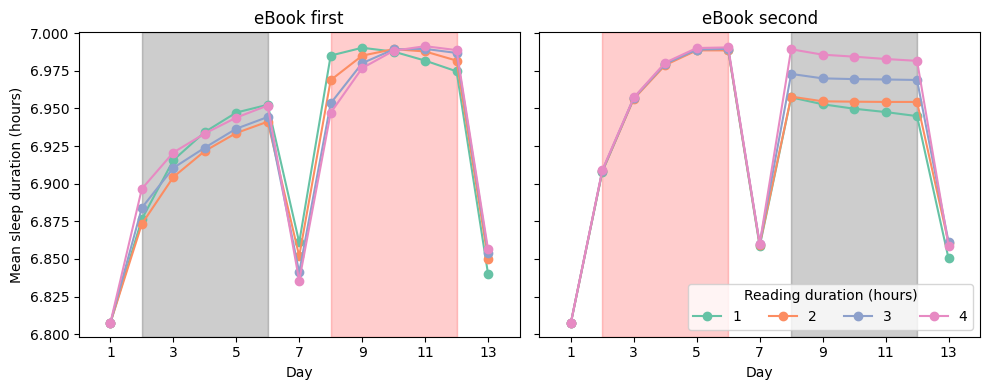

In [72]:
indoor_light = 90
reading_duration_times = [1, 2, 3, 4]

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

colors = sns.color_palette("Set2")[:4]

for idx, reading_duration in enumerate(reading_duration_times):
        if reading_duration < 4:
                ebook_first = simulation_features[(simulation_features['simulation_condition'] == 'chang14_ebook_first') &
                                                (simulation_features['indoor_light'] == indoor_light) &
                                                (simulation_features['reading_duration'] == reading_duration)]
                ebook_second = simulation_features[(simulation_features['simulation_condition'] == 'chang14_ebook_second') &
                                                (simulation_features['indoor_light'] == indoor_light) &
                                                (simulation_features['reading_duration'] == reading_duration)]

                ebook_first_sleep_duration = ebook_first.groupby('day')['sleep_duration'].mean()
                ebook_second_sleep_duration = ebook_second.groupby('day')['sleep_duration'].mean()
        else:
                ebook_first = baseline_simulation_features[(baseline_simulation_features['simulation_condition'] == 'chang14_ebook_first')]
                ebook_second = baseline_simulation_features[(baseline_simulation_features['simulation_condition'] == 'chang14_ebook_second')]

                ebook_first_sleep_duration = ebook_first.groupby('day')['sleep_duration'].mean()
                ebook_second_sleep_duration = ebook_second.groupby('day')['sleep_duration'].mean()

        days = np.arange(1, 14)


        axs[0].plot(days, ebook_first_sleep_duration,
                        marker='o', color=colors[idx], label=f"{reading_duration}")
        axs[0].axvspan(2, 6, color='black', alpha=0.05)
        axs[0].axvspan(8, 12, color='red', alpha=0.05)
        axs[0].set_title('eBook first')

        axs[1].plot(days, ebook_second_sleep_duration,
                        marker='o', color=colors[idx], label=f"{reading_duration}")
        axs[1].legend()
        axs[1].axvspan(2, 6, color='red', alpha=0.05)
        axs[1].axvspan(8, 12, color='black', alpha=0.05)
        axs[1].set_title('eBook second')

        axs[0].set_xlim(0, 14)
        axs[1].set_xlim(0, 14)
        axs[0].set_xticks(days[::2])
        axs[1].set_xticks(days[::2])

        axs[0].set_ylabel('Mean sleep duration (hours)')
        axs[0].set_xlabel('Day')
        axs[1].set_xlabel('Day')


axs[1].legend(title='Reading duration (hours)', loc='lower right', ncol=4)

plt.tight_layout()
plt.show()

## As a function of indoor lux

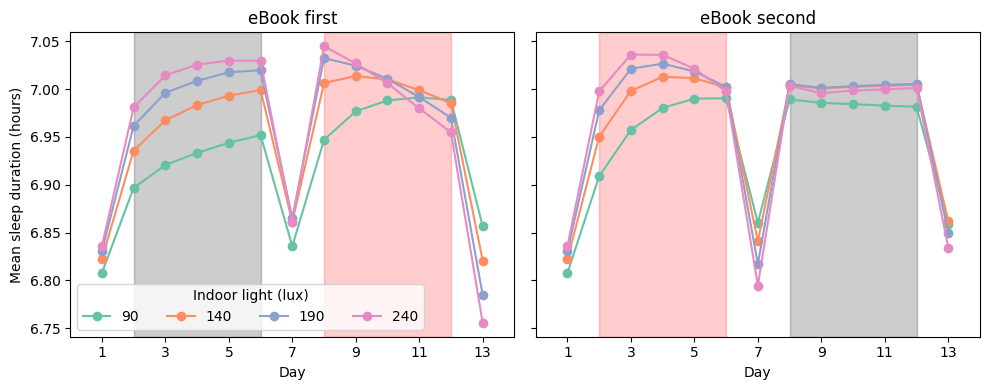

In [77]:
indoor_light_values = [90, 140, 190, 240]
reading_duration = 4

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

colors = sns.color_palette("Set2")[:4]

for idx, indoor_light in enumerate(indoor_light_values):
        if indoor_light > 90:
                ebook_first = simulation_features[(simulation_features['simulation_condition'] == 'chang14_ebook_first') &
                                                (simulation_features['indoor_light'] == indoor_light) &
                                                (simulation_features['reading_duration'] == reading_duration)]
                ebook_second = simulation_features[(simulation_features['simulation_condition'] == 'chang14_ebook_second') &
                                                (simulation_features['indoor_light'] == indoor_light) &
                                                (simulation_features['reading_duration'] == reading_duration)]

                ebook_first_sleep_duration = ebook_first.groupby('day')['sleep_duration'].mean()
                ebook_second_sleep_duration = ebook_second.groupby('day')['sleep_duration'].mean()
        else:
                ebook_first = baseline_simulation_features[(baseline_simulation_features['simulation_condition'] == 'chang14_ebook_first')]
                ebook_second = baseline_simulation_features[(baseline_simulation_features['simulation_condition'] == 'chang14_ebook_second')]

                ebook_first_sleep_duration = ebook_first.groupby('day')['sleep_duration'].mean()
                ebook_second_sleep_duration = ebook_second.groupby('day')['sleep_duration'].mean()

        days = np.arange(1, 14)


        axs[0].plot(days, ebook_first_sleep_duration,
                        marker='o', color=colors[idx], label=f"{indoor_light}")
        axs[0].axvspan(2, 6, color='black', alpha=0.05)
        axs[0].axvspan(8, 12, color='red', alpha=0.05)
        axs[0].set_title('eBook first')

        axs[1].plot(days, ebook_second_sleep_duration,
                        marker='o', color=colors[idx], label=f"{indoor_light}")
        axs[1].axvspan(2, 6, color='red', alpha=0.05)
        axs[1].axvspan(8, 12, color='black', alpha=0.05)
        axs[1].set_title('eBook second')

        axs[0].set_xlim(0, 14)
        axs[1].set_xlim(0, 14)
        axs[0].set_xticks(days[::2])
        axs[1].set_xticks(days[::2])

        axs[0].set_ylabel('Mean sleep duration (hours)')
        axs[0].set_xlabel('Day')
        axs[1].set_xlabel('Day')


axs[0].legend(title='Indoor light (lux)', loc='lower left', ncol=4)

plt.tight_layout()
plt.show()